In [47]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import sys, os
sys.path.append('../../src/')
import matplotlib.pyplot as plt
import seaborn as sns
# import toolbox
from toolbox import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [48]:
AIC_results = pd.concat([pd.read_csv('btc_AIC_summary.csv', index_col=0), 
 pd.read_csv('eth_AIC_summary.csv', index_col=0)], axis=1)
AIC_summary = AIC_results.fillna(0).T
AIC_summary = AIC_summary.astype(int)
AIC_summary = AIC_summary.loc[:,
                ['t_Copula', 'Plackett', 'Gauss Mix Indep',
                 'rotGumbel', 'NIG']]

In [49]:
AIC_summary = AIC_summary.div(AIC_summary.sum(axis=1), axis=0).apply(lambda x: round(x, 4))*100

In [50]:
AIC_summary.columns = ['t', 'Plackett', 'GMI', 'rotGumbel', 'NIG']

In [51]:
AIC_summary.index = ['BTC', 'ETH']

In [52]:
AIC_summary

,t,Plackett,GMI,rotGumbel,NIG
BTC,60.00,1.11,3.33,8.89,26.67
ETH,35.14,0.00,24.32,15.68,24.86


In [53]:
btc_rh_results = pd.read_csv('btc_rh_results.csv', index_col=0)
eth_rh_results = pd.read_csv('eth_rh_results.csv', index_col=0)

In [54]:
risk_measures_names = ['Variance',
                 'ES 95%', 'ES 99%',
                 'VaR 95%', 'VaR 99%', 
                 'ERM k=10']

risk_measures_arr_order = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10']

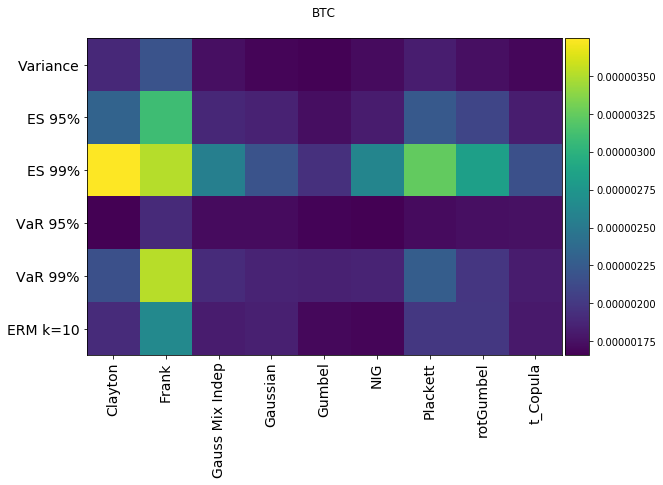

In [55]:
# MSEs of btc
risk_measure_arr = list(set(btc_rh_results.risk_measure))
copula_names = list(set(btc_rh_results.copula))

MSEs = []

for rm in risk_measure_arr:
    for c in copula_names:
        _id = btc_rh_results.copula == c
        _id &= btc_rh_results.risk_measure == rm
        rh = btc_rh_results.loc[_id, 'rh']
        
        avg_rh = np.mean(rh)
        
        MSE = np.mean(rh**2)
        
        MSEs.append([c, rm, MSE])
        
MSEs = pd.DataFrame(MSEs)
MSEs.columns = ['copula', 'risk_measure', 'MSE']


MSEs = MSEs.pivot(index='copula', columns = 'risk_measure',
                           values='MSE')


MSEs = MSEs.loc[:, risk_measures_arr_order]
MSEs.columns = risk_measures_names

factor = 1
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=1, ncols=1)
im = ax.matshow(MSEs.T)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['']+list(MSEs.index), fontsize=14, rotation=90)
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+list(MSEs.columns), fontsize=14)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC')

plt.savefig('intraday_BTC_MSEs.pdf', transparent=True,  bbox_inches = 'tight')

In [56]:
len(rh)

744

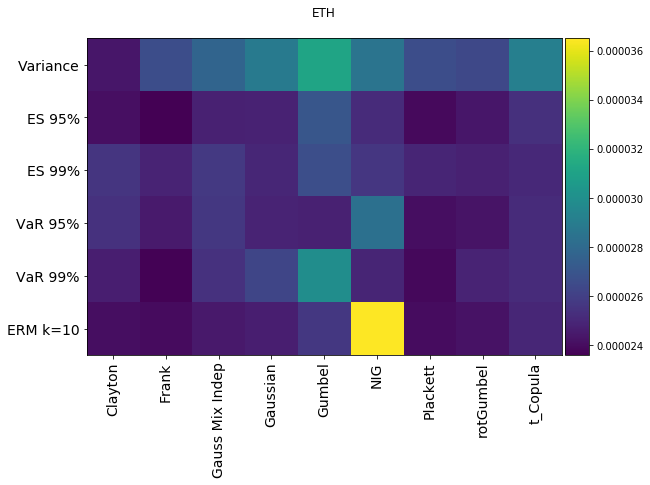

In [57]:
# ETH MSE
risk_measure_arr = list(set(eth_rh_results.risk_measure))
copula_names = list(set(eth_rh_results.copula))

MSEs = []

for rm in risk_measure_arr:
    for c in copula_names:
        _id = eth_rh_results.copula == c
        _id &= eth_rh_results.risk_measure == rm
        rh = eth_rh_results.loc[_id, 'rh']
        
        avg_rh = np.mean(rh)
        
        MSE = np.mean(rh**2)
        
        MSEs.append([c, rm, MSE])
        
MSEs = pd.DataFrame(MSEs)
MSEs.columns = ['copula', 'risk_measure', 'MSE']


MSEs = MSEs.pivot(index='copula', columns = 'risk_measure',
                           values='MSE')

MSEs = MSEs.loc[:, risk_measures_arr_order]
MSEs.columns = risk_measures_names

factor = 1
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=1, ncols=1)
im = ax.matshow(MSEs.T)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['']+list(MSEs.index), fontsize=14, rotation=90)
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+list(MSEs.columns), fontsize=14)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('ETH')
plt.savefig('intraday_ETH_MSEs.pdf', transparent=True,  bbox_inches = 'tight')

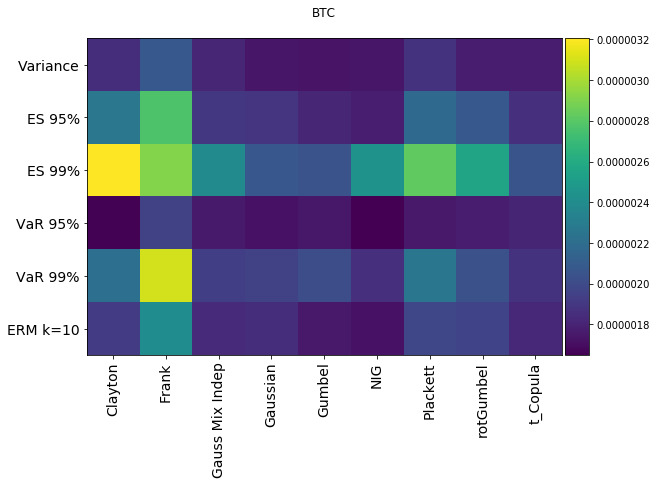

In [58]:
# lower semi variance of btc
risk_measure_arr = list(set(btc_rh_results.risk_measure))
copula_names = list(set(btc_rh_results.copula))

semiVariance_results = []

for rm in risk_measure_arr:
    for c in copula_names:
        _id = btc_rh_results.copula == c
        _id &= btc_rh_results.risk_measure == rm
        rh = btc_rh_results.loc[_id, 'rh']
        
        avg_rh = np.mean(rh)
        
        semiVariance = np.mean((avg_rh-rh[rh<=avg_rh])**2)
        
        semiVariance_results.append([c, rm, semiVariance])
        
semiVariance_results = pd.DataFrame(semiVariance_results)
semiVariance_results.columns = ['copula', 'risk_measure', 'semiVariance']


semiVariance_results = semiVariance_results.pivot(index='copula', columns = 'risk_measure',
                           values='semiVariance')


semiVariance_results = semiVariance_results.loc[:, risk_measures_arr_order]
semiVariance_results.columns = risk_measures_names


factor = 1
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=1, ncols=1)
im = ax.matshow(semiVariance_results.T)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['']+list(semiVariance_results.index), fontsize=14, rotation=90)
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+list(semiVariance_results.columns), fontsize=14)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC')

plt.savefig('intraday_BTC_LSVs.pdf', transparent=True,  bbox_inches = 'tight')

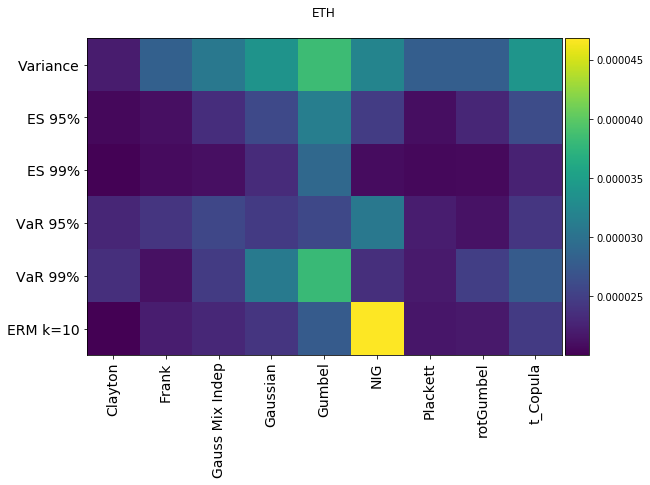

In [59]:
# lower semi variance of eth
risk_measure_arr = list(set(eth_rh_results.risk_measure))
copula_names = list(set(eth_rh_results.copula))

semiVariance_results = []

for rm in risk_measure_arr:
    for c in copula_names:
        _id = eth_rh_results.copula == c
        _id &= eth_rh_results.risk_measure == rm
        rh = eth_rh_results.loc[_id, 'rh']
        
        avg_rh = np.mean(rh)
        
        semiVariance = np.mean((avg_rh-rh[rh<=avg_rh])**2)
        
        semiVariance_results.append([c, rm, semiVariance])
        
semiVariance_results = pd.DataFrame(semiVariance_results)
semiVariance_results.columns = ['copula', 'risk_measure', 'semiVariance']


semiVariance_results = semiVariance_results.pivot(index='copula', columns = 'risk_measure',
                           values='semiVariance')


semiVariance_results = semiVariance_results.loc[:, risk_measures_arr_order]
semiVariance_results.columns = risk_measures_names

from mpl_toolkits.axes_grid1 import make_axes_locatable

factor = 1
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=1, ncols=1)
im = ax.matshow(semiVariance_results.T)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(['']+list(semiVariance_results.index), fontsize=14, rotation=90)
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+list(semiVariance_results.columns), fontsize=14)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('ETH')

plt.savefig('intraday_ETH_LSVs.pdf', transparent=True,   bbox_inches = 'tight')